# Epilepsy_Prediction

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
Data=pd.read_csv("Epilepsy_Dataset.csv")
Data.head()

,FirstName,LastName,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,...,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
0,AMGOTH,Vyshnavi,20,0,43,0,1,0,0,0,...,1,1,1,1,1,4,0,1,3,1
1,ANGIDI,Vishnu,19,1,45,0,1,1,0,1,...,1,2,1,1,1,0,0,1,2,1
2,BADAVATH,Sahasra,17,0,43,1,1,1,0,0,...,1,2,2,1,1,0,0,1,1,1
3,BANDI,Akshara,16,0,38,1,1,1,1,0,...,0,2,0,1,1,0,1,1,2,1
4,BEKKANTI,Santosh,45,1,68,1,1,1,0,1,...,1,2,0,1,1,0,0,0,2,1


 # EDA🔎🧹

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   FirstName                         1773 non-null   object
 1   LastName                          1773 non-null   object
 2   Age                               1773 non-null   int64 
 3   Gender                            1773 non-null   int64 
 4   Weight                            1773 non-null   int64 
 5   Heredity                          1773 non-null   int64 
 6   Diabetes                          1773 non-null   int64 
 7   Asthma                            1773 non-null   int64 
 8   Drug_Consumption                  1773 non-null   int64 
 9   Alcohol_Consumption               1773 non-null   int64 
 10  Hormonal_Imbalance                1773 non-null   int64 
 11  Stress                            1773 non-null   int64 
 12  Blood_Pressure      

In [4]:
# num of row and col
Data.shape 

(1773, 21)

In [5]:
#statistic of dataset
pd.options.display.float_format='{:,.2f}'.format
Data.describe()

,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
count,"1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00","1,773.00"
mean,28.11,0.61,55.34,0.61,0.51,0.54,0.35,0.40,0.48,0.73,0.92,0.79,0.68,0.30,0.86,0.59,0.70,1.19,0.61
std,13.67,0.49,14.01,0.49,0.50,0.50,0.48,0.49,0.50,0.44,0.64,0.69,0.47,0.46,1.20,0.49,0.46,1.08,0.49
min,10.00,0.00,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,45.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,22.00,1.00,55.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00
75%,34.00,1.00,65.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00
max,82.00,1.00,100.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,4.00,1.00,1.00,3.00,1.00


In [6]:
# duplication?    no duplication 
Data.duplicated().sum()

0

In [7]:
# missing value??   no missing value 
Data.isnull().sum() 

FirstName                           0
LastName                            0
Age                                 0
Gender                              0
Weight                              0
Heredity                            0
Diabetes                            0
Asthma                              0
Drug_Consumption                    0
Alcohol_Consumption                 0
Hormonal_Imbalance                  0
Stress                              0
Blood_Pressure                      0
Fever                               0
Lack_of_Sleep                       0
Heart_Stroke                        0
Brain_tumor(stage)                  0
Brain_Injuries                      0
Frequent_consumption_of_junkfood    0
Seizures_time_Duration              0
Affected                            0
dtype: int64

In [8]:
#Droping FirstName &LastName Column
Data= Data.drop(Data.columns[[0, 1]],axis = 1)

In [9]:
Data.columns

Index(['Age', 'Gender', 'Weight', 'Heredity', 'Diabetes', 'Asthma',
       'Drug_Consumption', 'Alcohol_Consumption', 'Hormonal_Imbalance',
       'Stress', 'Blood_Pressure', 'Fever', 'Lack_of_Sleep', 'Heart_Stroke',
       'Brain_tumor(stage)', 'Brain_Injuries',
       'Frequent_consumption_of_junkfood', 'Seizures_time_Duration',
       'Affected'],
      dtype='object')

In [10]:
# unique values 
Data.nunique()

Age                                 49
Gender                               2
Weight                              56
Heredity                             2
Diabetes                             2
Asthma                               2
Drug_Consumption                     2
Alcohol_Consumption                  2
Hormonal_Imbalance                   2
Stress                               2
Blood_Pressure                       3
Fever                                3
Lack_of_Sleep                        2
Heart_Stroke                         2
Brain_tumor(stage)                   5
Brain_Injuries                       2
Frequent_consumption_of_junkfood     2
Seizures_time_Duration               4
Affected                             2
dtype: int64

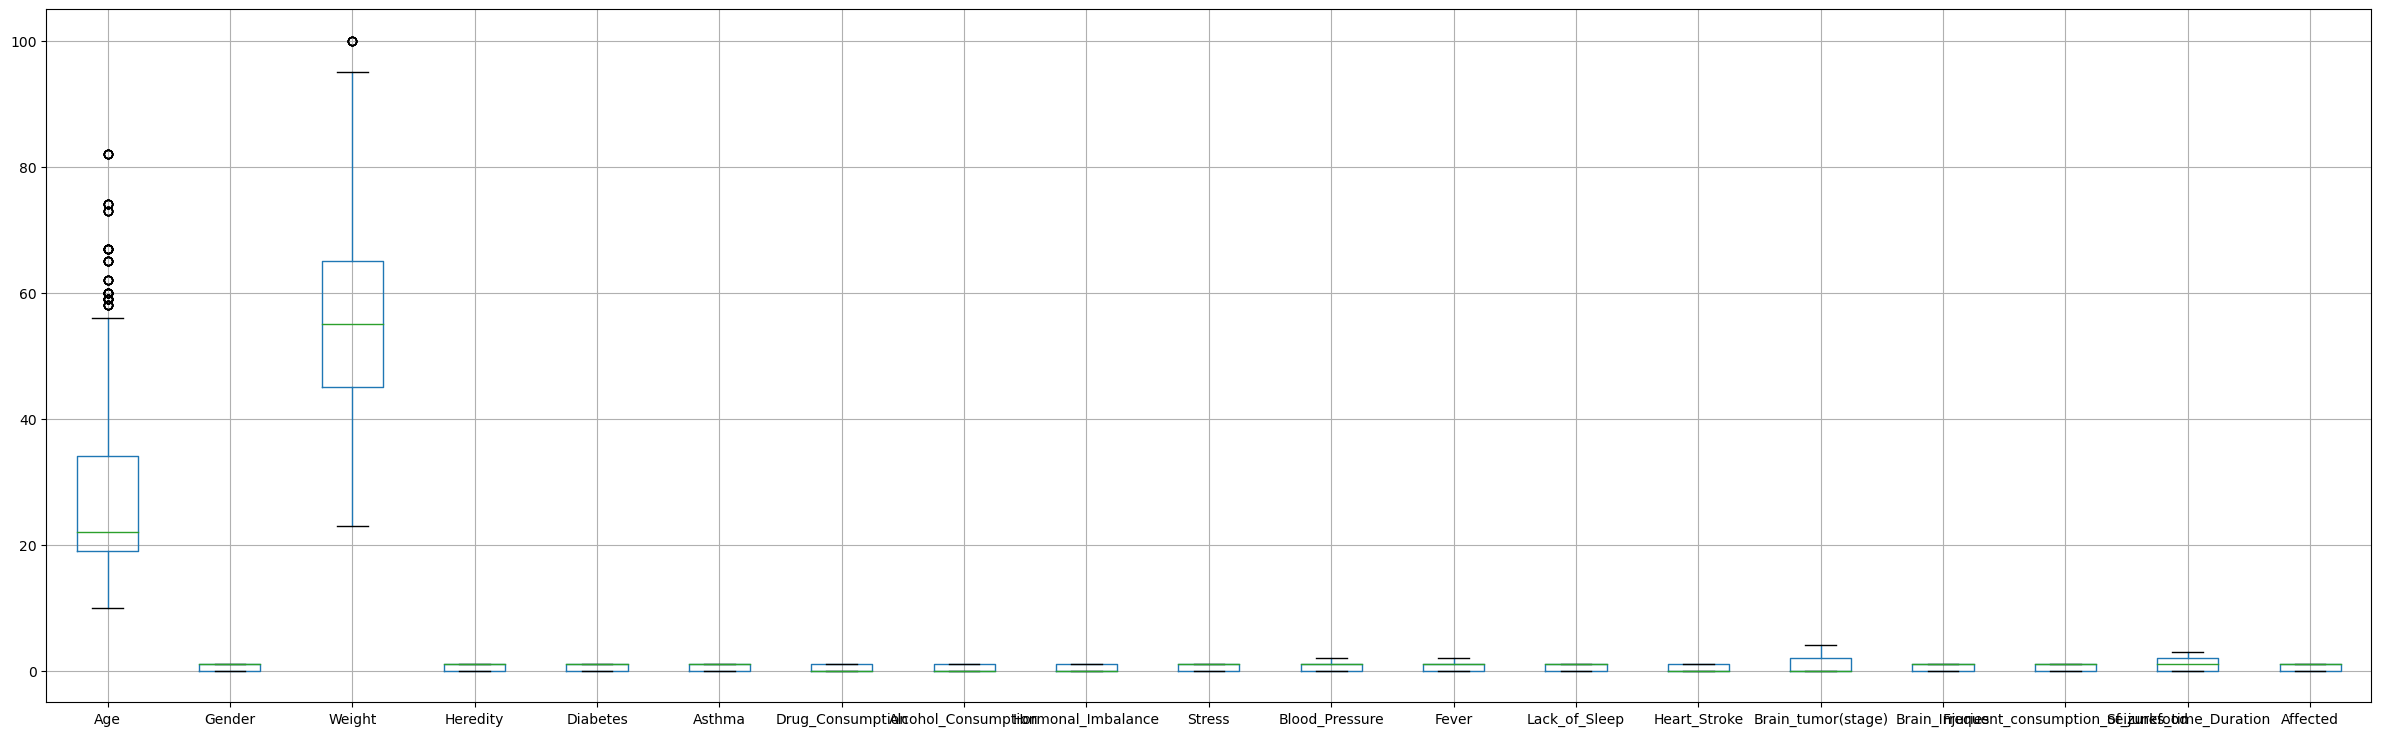

In [11]:
# outliers 
Data.boxplot(figsize=(30,9))
plt.show()

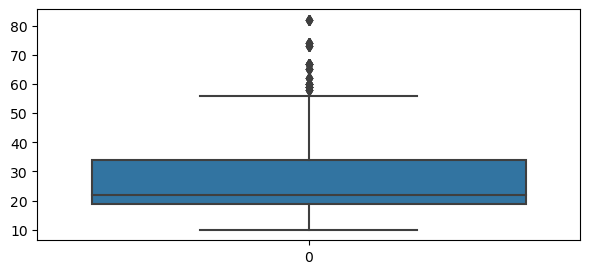

In [12]:
# check outliers
plt.figure(figsize=(7,3))
sns.boxplot(Data["Age"])
plt.show()

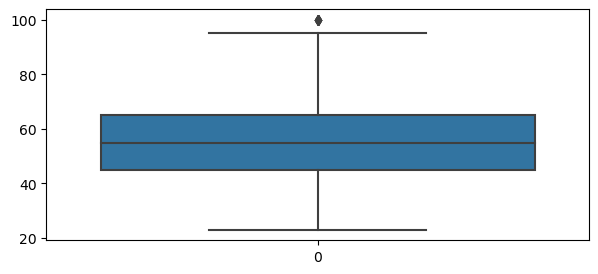

In [13]:
# check outliers
plt.figure(figsize=(7,3))
sns.boxplot(Data["Weight"])
plt.show()

In [14]:
 #drop outlier points from 'Weight'.
Data=Data[Data['Weight'] <= 95]

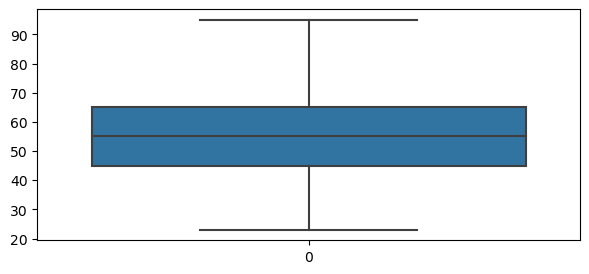

In [15]:
# check outliers again
plt.figure(figsize=(7,3))
sns.boxplot(Data["Weight"])
plt.show()

In [16]:
cor= Data.select_dtypes(exclude=object).corr()
cor

,Age,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected
Age,1.00,0.01,0.68,0.02,0.11,-0.04,0.08,0.22,0.04,0.05,0.18,0.09,-0.03,0.01,-0.03,0.06,-0.21,0.09,0.02
Gender,0.01,1.00,0.02,0.04,-0.00,-0.02,-0.00,0.10,-0.05,0.04,0.07,-0.02,0.01,-0.12,-0.02,-0.01,-0.02,-0.01,-0.04
Weight,0.68,0.02,1.00,-0.07,-0.08,-0.19,-0.02,0.28,-0.08,-0.01,0.22,0.00,-0.12,-0.03,-0.11,-0.11,-0.24,-0.06,-0.13
Heredity,0.02,0.04,-0.07,1.00,0.42,0.39,0.38,0.08,0.32,0.30,-0.02,0.07,0.27,-0.03,0.35,0.34,0.37,0.30,0.43
Diabetes,0.11,-0.00,-0.08,0.42,1.00,0.32,0.43,0.11,0.40,0.34,-0.14,0.20,0.39,0.01,0.45,0.33,0.35,0.43,0.45
Asthma,-0.04,-0.02,-0.19,0.39,0.32,1.00,0.36,0.13,0.44,0.25,-0.07,0.10,0.27,0.02,0.43,0.44,0.34,0.32,0.40
Drug_Consumption,0.08,-0.00,-0.02,0.38,0.43,0.36,1.00,0.22,0.38,0.22,-0.14,0.15,0.31,0.04,0.52,0.37,0.30,0.40,0.44
Alcohol_Consumption,0.22,0.10,0.28,0.08,0.11,0.13,0.22,1.00,-0.02,0.18,0.12,0.09,0.01,0.00,0.11,0.19,-0.04,0.16,0.02
Hormonal_Imbalance,0.04,-0.05,-0.08,0.32,0.40,0.44,0.38,-0.02,1.00,0.22,0.00,0.16,0.28,0.01,0.32,0.30,0.26,0.31,0.34
Stress,0.05,0.04,-0.01,0.30,0.34,0.25,0.22,0.18,0.22,1.00,0.03,0.08,0.43,-0.05,0.29,0.15,0.17,0.27,0.25


 # Analysis📝 & Visualiation📊

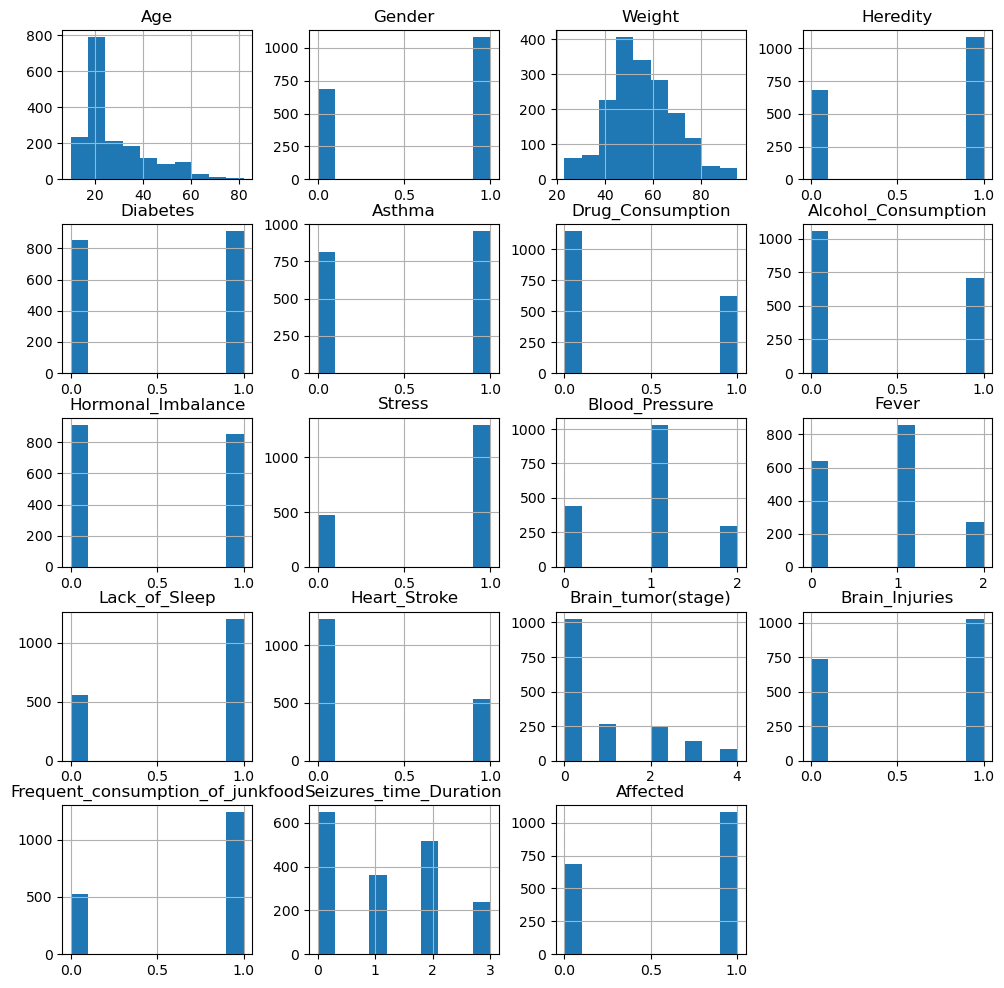

In [17]:
#distribution of data
Data.hist(figsize=(12,12))
plt.show()

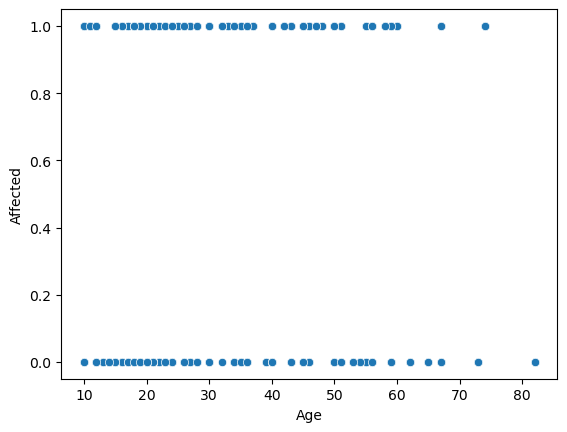

In [18]:
# distribution of data between Affected and Age
sns.scatterplot(x=Data.Age,y= Data.Affected)
plt.show()

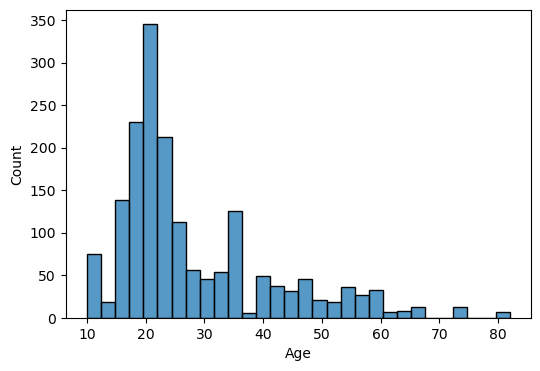

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(Data.Age, bins=30)
plt.show()

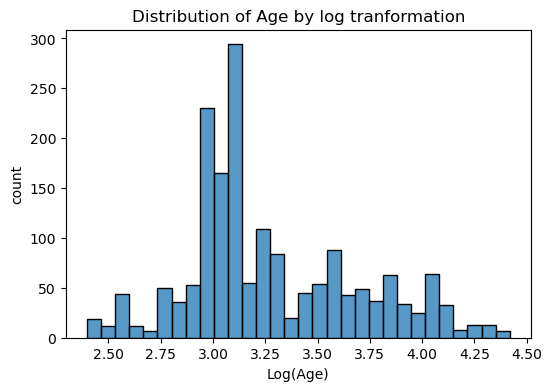

In [20]:
#distribution of log tranformation
Data['log_Age'] = np.log1p(Data.Age)
plt.figure(figsize=(6, 4))
sns.histplot(Data.log_Age, bins=30)
plt.ylabel('count')
plt.xlabel('Log(Age)')
plt.title('Distribution of Age by log tranformation')
plt.show()

In [21]:
Data.Age.skew()

1.4080467480387282

In [22]:
Data.log_Age.skew()

0.5656785416907414

In [23]:
Data.columns

Index(['Age', 'Gender', 'Weight', 'Heredity', 'Diabetes', 'Asthma',
       'Drug_Consumption', 'Alcohol_Consumption', 'Hormonal_Imbalance',
       'Stress', 'Blood_Pressure', 'Fever', 'Lack_of_Sleep', 'Heart_Stroke',
       'Brain_tumor(stage)', 'Brain_Injuries',
       'Frequent_consumption_of_junkfood', 'Seizures_time_Duration',
       'Affected', 'log_Age'],
      dtype='object')

In [24]:
Data.drop('Age', axis=1, inplace=True)
Data.head()

,Gender,Weight,Heredity,Diabetes,Asthma,Drug_Consumption,Alcohol_Consumption,Hormonal_Imbalance,Stress,Blood_Pressure,Fever,Lack_of_Sleep,Heart_Stroke,Brain_tumor(stage),Brain_Injuries,Frequent_consumption_of_junkfood,Seizures_time_Duration,Affected,log_Age
0,0,43,0,1,0,0,0,0,1,1,1,1,1,4,0,1,3,1,3.04
1,1,45,0,1,1,0,1,0,1,2,1,1,1,0,0,1,2,1,3.00
2,0,43,1,1,1,0,0,1,1,2,2,1,1,0,0,1,1,1,2.89
3,0,38,1,1,1,1,0,1,0,2,0,1,1,0,1,1,2,1,2.83
4,1,68,1,1,1,0,1,0,1,2,0,1,1,0,0,0,2,1,3.83


In [25]:
#male 1 
#female 0
Data["Gender"].value_counts()

Gender
1    1079
0     687
Name: count, dtype: int64

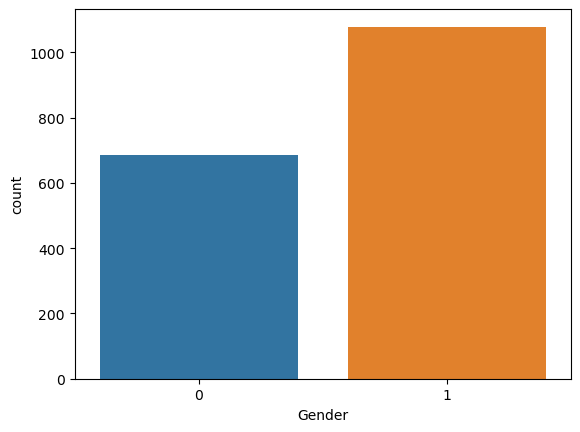

In [26]:
#How many values there in two categoris --> we can use value_counts() function
#we have observed that count of male is grater than female
sns.countplot(x='Gender',data=Data)
plt.show()

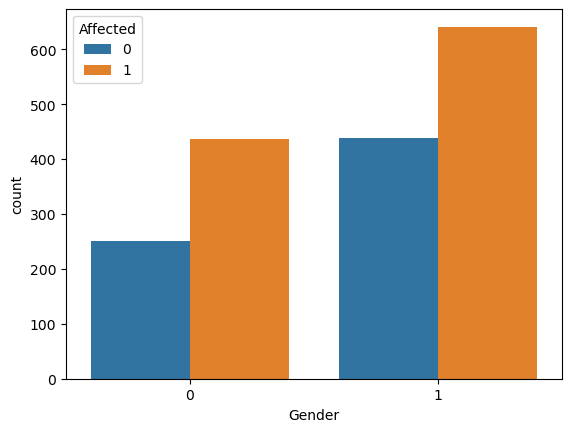

In [27]:
# #of infected male is greater than uninfected male and also female 
sns.countplot(x='Gender',data=Data,hue='Affected')
plt.show()

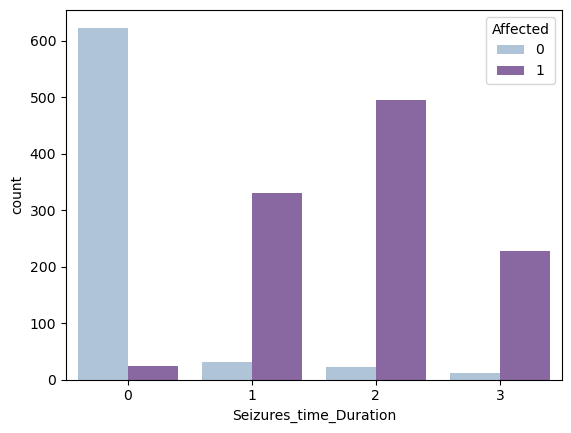

In [28]:
sns.countplot(x='Seizures_time_Duration',data=Data, hue='Affected', palette='BuPu' )
plt.show()

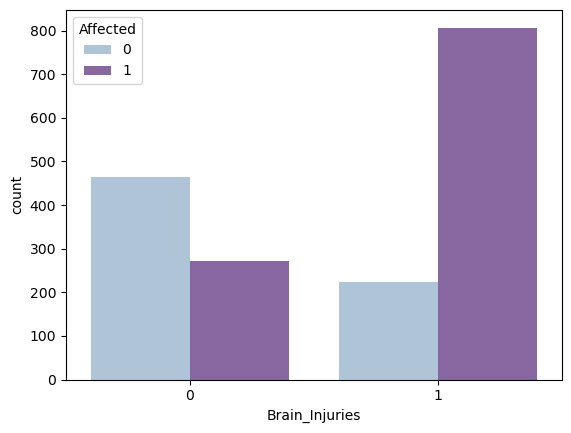

In [29]:
sns.countplot(x='Brain_Injuries',data=Data, hue='Affected', palette='BuPu' )
plt.show()

Seizures_time_Duration
0    647
2    517
1    362
3    240
Name: count, dtype: int64


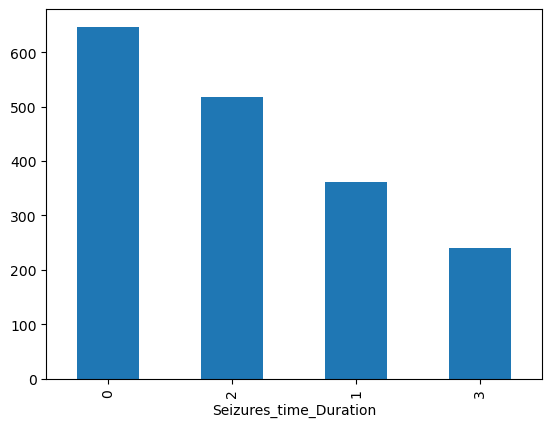

In [30]:
print(Data.Seizures_time_Duration.value_counts())
Data.Seizures_time_Duration.value_counts().plot.bar()
plt.show()

In [31]:
Data['Affected'].value_counts()

Affected
1    1078
0     688
Name: count, dtype: int64

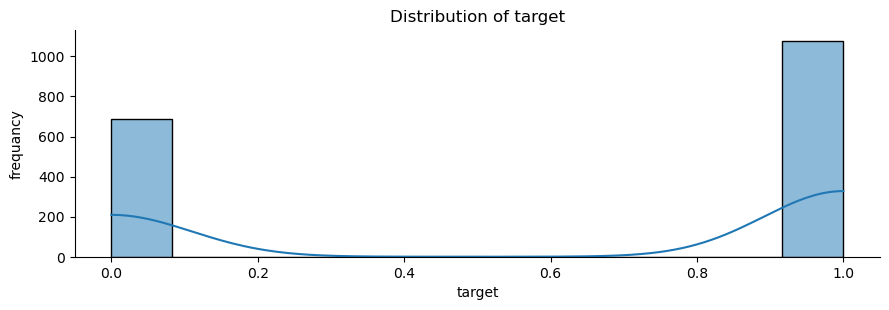

In [32]:
sns.displot(Data['Affected'],kde =True,height=3,aspect=3)
plt.xlabel("target")
plt.ylabel("frequancy")
plt.title("Distribution of target")
plt.show()

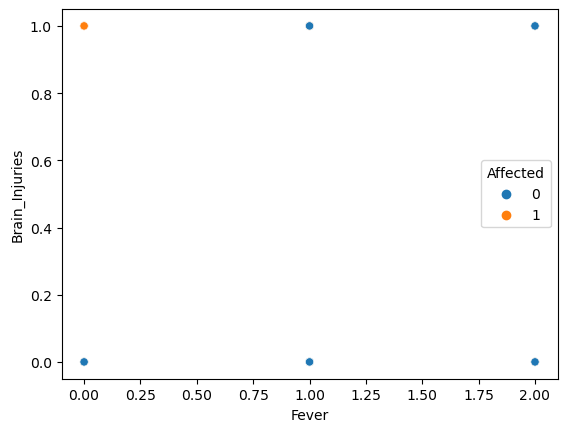

In [33]:
sns.scatterplot(x='Fever',y = 'Brain_Injuries',hue = 'Affected',data = Data)
plt.show()

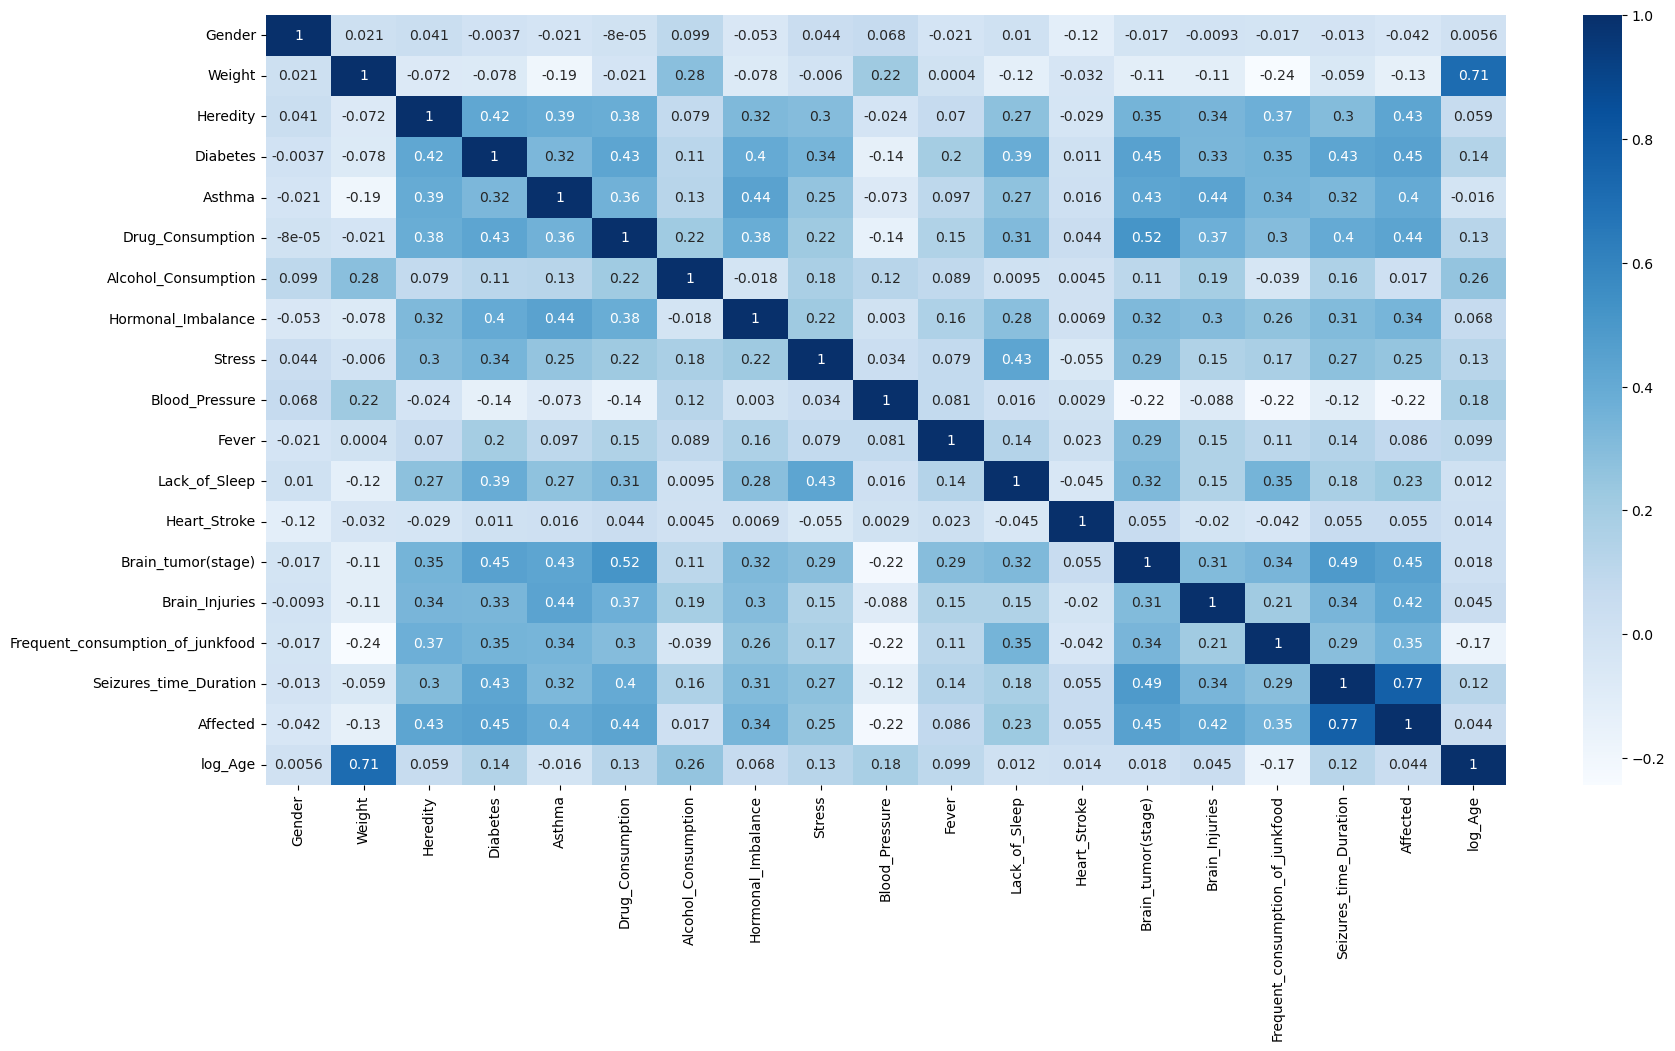

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(Data.corr(), annot=True, cmap='Blues')
plt.show()

# Feature Scaling 

In [35]:
scaler = StandardScaler()
scaled_data= scaler.fit_transform(Data)
pd.DataFrame(X)


NameError: name 'X' is not defined

# Feature Selection 

In [ ]:
x= Data.drop('Affected',axis=1)
y= Data['Affected']

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

def wrapper_method(x, y, model=LogisticRegression()):
    sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='backward')
  
    sfs.fit(x, y)
    selected_features = sfs.support_
    return selected_features 

In [ ]:
wrapper_method(x, y, model=LogisticRegression())

In [ ]:
# feature importance using Random Forest 

In [ ]:
#The higher the Gini importance, the more important the feature is for the model
importances = rfc.feature_importances_

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(x.shape[1]), importances)
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
plt.ylabel('Feature Imporance Scores')
plt.xlabel('Features')
plt.title('Feature Importances using Random Forest ')
plt.show()

# **Dimensionality reduction**
Converting the DataFrame into 2D DataFrame for visualization

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_Data = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_Data

# Train-Test-Split

In [ ]:
# 70% for train and 30% for test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print('x_train:', x_train.size)
print('x_test:',x_test.size)
print('y_train:', y_train.size)
print('y_test:', y_test.size)

# Logistic regression




In [ ]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,prediction)
cm

In [ ]:
sns.heatmap(cm,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,prediction)
print(acc*100)

# Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier()
model2 = rfc.fit(x_train, y_train)
prediction2 = model2.predict(x_test)
confusion_matrix(y_test, prediction2)


In [ ]:
cm2=confusion_matrix(y_test,prediction)
cm2

In [ ]:
sns.heatmap(cm2,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [ ]:
acc=accuracy_score(y_test,prediction2)
print(acc*100)

# Decision Tree

In [ ]:
dtc=DecisionTreeClassifier
model3=dtc.fit(x_train,y_train)
prediction3=model3.predict(x_test)
cm3= confusion_matrix(y_test,prediction3)
cm3

In [ ]:
sns.heatmap(cm,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [ ]:
print(accuracy_score(y_test,prediction3)*100)

# SVM

In [ ]:
svm=SVC(kernel="linear")
model4=svm.fit(x_train,y_train)
prediction4=model4.predict(x_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

In [ ]:
sns.heatmap(cm4,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [ ]:
print(accuracy_score(y_test,prediction4)*100)

# Naive Byes 

In [ ]:
NB = GaussianNB()
model5 = NB.fit(x_train, y_train)
prediction5 = model5.predict(x_test)
cm5= confusion_matrix(y_test, prediction5)
cm5

In [ ]:
sns.heatmap(cm5,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [ ]:
print(accuracy_score(y_test,prediction5)*100)

# Voting 

In [ ]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(x_train, y_train)

In [ ]:
 print(accuracy_score(y_test, y_pred)*100)

# Bagging 

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10000,
max_samples=100, bootstrap=True,n_jobs=-1)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
ada_clf.fit(x_train, y_train)
y_pred =ada_clf.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

# Stack

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [('model1', DecisionTreeClassifier()), ('model2',LogisticRegression())]
final_estimator = LogisticRegression()
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking_clf.fit(x_train, y_train)
predictions = stacking_clf.predict(x_test)

In [ ]:
print(accuracy_score(y_test,predictions)*100)